<a href="https://colab.research.google.com/github/VictorTerres/calculosDadosRPG/blob/main/ArcoLongo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Valores em comum para todos os Testes

import random
import math

valor_ac = 15
modificador_atributo = 5
modificador_acerto_proficiencia = 2
modificador_acerto_extra = 2
vantagem_grito = 0

In [ ]:
## Ataque do Arco Longo - Inimigo Único (Monstruosidade) - Estilo: Arquearia + Talento: Piercer

# Criar vetores para armazenar as rolagens e os ataques
rolagens = []
ataques = []
vantagens = []

# Helper function to calculate attack roll result
def calculate_attack_roll(roll, advantage, modificador_atributo, modificador_acerto_proficiencia, modificador_acerto_extra):
    if advantage:
        roll = max(random.randint(1, 20), random.randint(1, 20))
    else:
        roll = random.randint(1, 20)

    if roll == 20:
      return roll + modificador_atributo + modificador_acerto_proficiencia + modificador_acerto_extra
    else:
      return roll + modificador_atributo + modificador_acerto_proficiencia + modificador_acerto_extra

# Helper function to calculate damage
def calculate_damage(roll_result, valor_ac, modificador_atributo, is_critical):
    if roll_result >= valor_ac:
        if is_critical:
            rolagens_dano = [random.randint(1, 8), random.randint(1, 8), random.randint(1, 8)]
            menor_valor = min(rolagens_dano)
            if menor_valor < 4:
                indice_menor = rolagens_dano.index(menor_valor)
                rolagens_dano[indice_menor] = random.randint(1, 8)
            dano = sum(rolagens_dano)
            dano_marca = random.randint(1, 6) + random.randint(1, 6)
            return dano + dano_marca + modificador_atributo
        else:
            dano = random.randint(1, 8)
            if dano < 4:
                dano = random.randint(1, 8)
            dano_marca = random.randint(1, 6)
            return dano + dano_marca + modificador_atributo
    else:
        return 0

################################# Turno 01 - Marca do Caçador + Ataque
advantage = 0
vantagens.append(advantage)
rolagem_1a = calculate_attack_roll(0, advantage, modificador_atributo, modificador_acerto_proficiencia, modificador_acerto_extra)
rolagens.append(rolagem_1a)
is_critical_1a = rolagem_1a - modificador_atributo - modificador_acerto_proficiencia - modificador_acerto_extra == 20
dano_final_1a = calculate_damage(rolagem_1a, valor_ac, modificador_atributo, is_critical_1a)
ataques.append(dano_final_1a)


################################## Turno 02 - Grito de Guerra + Ataque Principal
advantage = 1
vantagens.append(advantage)
rolagem_2a = calculate_attack_roll(0, advantage, modificador_atributo, modificador_acerto_proficiencia, modificador_acerto_extra)
rolagens.append(rolagem_2a)
is_critical_2a = rolagem_2a - modificador_atributo - modificador_acerto_proficiencia - modificador_acerto_extra == 20
dano_final_2a = calculate_damage(rolagem_2a, valor_ac, modificador_atributo, is_critical_2a)
ataques.append(dano_final_2a)

levou_dano = random.randint(1, 1000)
if levou_dano <= 77:
  advantage = 0

################################# Turno 03 ao 10 - Ataque Principal
for i in range(3, 11): # Loop para os Ataques
    # Ataque Principal
    vantagens.append(advantage)
    rolagem_pa = calculate_attack_roll(0, advantage, modificador_atributo, modificador_acerto_proficiencia, modificador_acerto_extra)
    rolagens.append(rolagem_pa)
    is_critical_pa = rolagem_pa - modificador_atributo - modificador_acerto_proficiencia - modificador_acerto_extra == 20
    dano_final_pa = calculate_damage(rolagem_pa, valor_ac, modificador_atributo, is_critical_pa)
    ataques.append(dano_final_pa)

    levou_dano = random.randint(1, 1000)
    if levou_dano <= 77:
      advantage = 0

################################################################################
# Calcular a média dos resultados
media_rolagens = sum(rolagens) / len(rolagens)
media_dano = sum(ataques) / len(ataques)

# Formatar os vetores para exibição com 2 dígitos
rolagens_formatadas = [f"{rolagem:02d}" for rolagem in rolagens]
ataques_formatados = [f"{ataque:02d}" for ataque in ataques]

# Exibir a média dos resultados e os vetores formatados
print(f"A média das rolagens é: {media_rolagens}")
print(rolagens_formatadas)
print(f"A média dos danos: {media_dano}")
print(ataques_formatados)

A média das rolagens é: 23.4
['19', '20', '27', '22', '26', '24', '26', '23', '20', '27']
A média dos danos: 14.1
['17', '12', '15', '14', '13', '14', '14', '13', '17', '12']


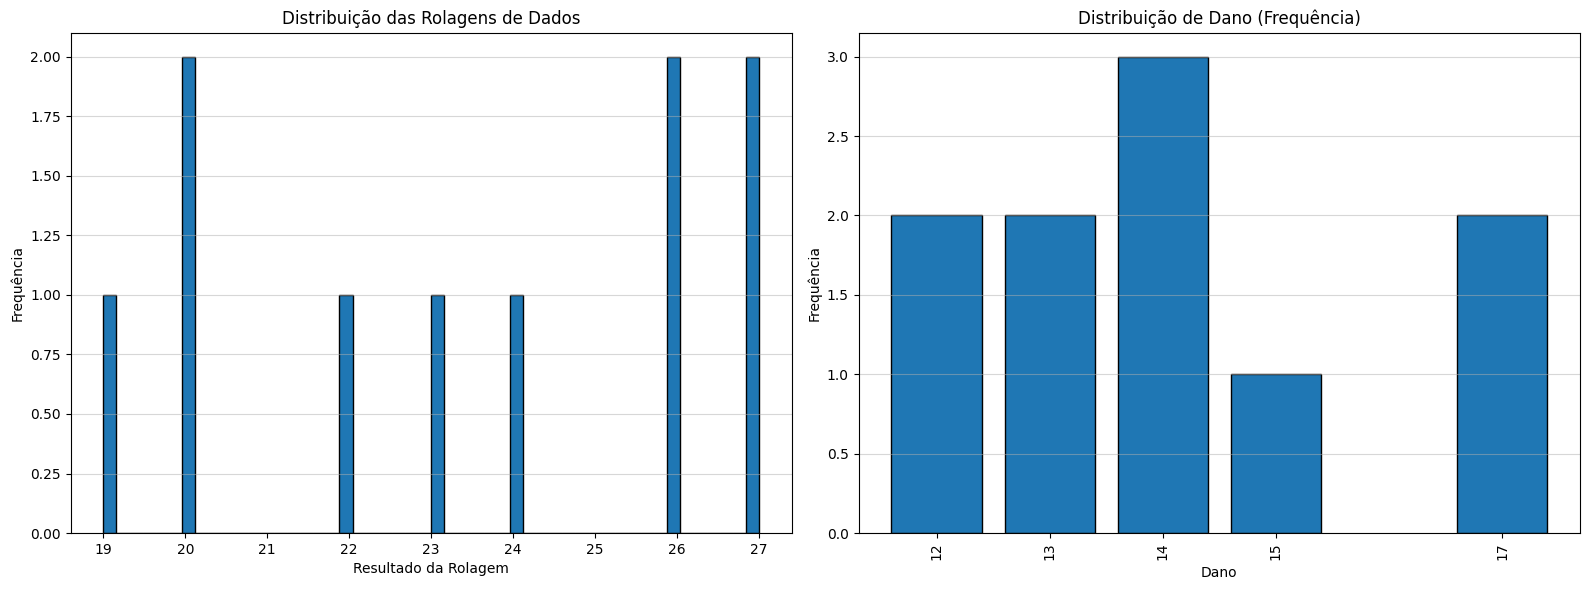

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

plt.figure(figsize=(16, 6)) # Aumenta o tamanho da figura para acomodar dois gráficos

# Gráfico 1: Distribuição das Rolagens de Dados
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, primeiro gráfico
plt.hist(rolagens, bins=50, edgecolor='black') # Cria o histograma com 50 barras
plt.title('Distribuição das Rolagens de Dados') # Adiciona um título
plt.xlabel('Resultado da Rolagem') # Adiciona um rótulo para o eixo x
plt.ylabel('Frequência') # Adiciona um rótulo para o eixo y
plt.grid(axis='y', alpha=0.5) # Adiciona uma grade no eixo y

# Gráfico 2: Distribuição de Dano em Frequência
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, segundo gráfico

# Contar a frequência de cada valor de dano
contagem_dano = Counter(ataques)
valores_dano = sorted(contagem_dano.keys())
frequencias_dano = [contagem_dano[valor] for valor in valores_dano]

# Criar o gráfico de barras para a distribuição de dano
plt.bar(valores_dano, frequencias_dano, edgecolor='black') # Usando frequências no eixo Y
plt.title('Distribuição de Dano (Frequência)') # Adiciona um título
plt.xlabel('Dano') # Adiciona um rótulo para o eixo x
plt.ylabel('Frequência') # Adiciona um rótulo para o eixo y
plt.grid(axis='y', alpha=0.5) # Adiciona uma grade no eixo y

# Definir os ticks do eixo x para os valores de dano (inteiros)
plt.xticks(valores_dano, rotation=90) # Rotate x-axis labels by 90 degrees

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show() # Exibe os gráficos

In [ ]:
import random
import math

# Initialize lists to store the averages from each run
all_avg_rolagens = []
all_avg_dano = []
all_advantage_attacks = [] # List to store whether an attack had advantage

# Helper function to calculate attack roll result
def calculate_attack_roll(advantage, modificador_atributo, modificador_acerto_proficiencia, modificador_acerto_extra):
    if advantage:
        roll = max(random.randint(1, 20), random.randint(1, 20))
    else:
        roll = random.randint(1, 20)

    if roll == 20:
      return roll + modificador_atributo + modificador_acerto_proficiencia + modificador_acerto_extra
    else:
      return roll + modificador_atributo + modificador_acerto_proficiencia + modificador_acerto_extra

# Helper function to calculate damage
def calculate_damage(roll_result, valor_ac, modificador_atributo, is_critical):
    if roll_result >= valor_ac:
        if is_critical:
            rolagens_dano = [random.randint(1, 8), random.randint(1, 8), random.randint(1, 8)]
            menor_valor = min(rolagens_dano)
            if menor_valor < 4:
                indice_menor = rolagens_dano.index(menor_valor)
                rolagens_dano[indice_menor] = random.randint(1, 8)
            dano = sum(rolagens_dano)
            dano_marca = random.randint(1, 6) + random.randint(1, 6)
            return dano + dano_marca + modificador_atributo
        else:
            dano = random.randint(1, 8)
            if dano < 4:
                dano = random.randint(1, 8)
            dano_marca = random.randint(1, 6)
            return dano + dano_marca + modificador_atributo
    else:
        return 0

# Run the simulation 100 times
for _ in range(100000):
    ## Ataque do Arco Longo - Inimigo Único (Monstruosidade) - Estilo: Arquearia + Talento: Piercer

    # Criar vetores para armazenar as rolagens e os ataques
    rolagens = []
    ataques = []
    vantagens = []

    # Turn 01 - Marca do Caçador + Ataque
    advantage = 0
    vantagens.append(advantage)
    rolagem = calculate_attack_roll(advantage, modificador_atributo, modificador_acerto_proficiencia, modificador_acerto_extra)
    rolagens.append(rolagem)
    is_critical = rolagem - modificador_atributo - modificador_acerto_proficiencia - modificador_acerto_extra == 20
    dano_final = calculate_damage(rolagem, valor_ac, modificador_atributo, is_critical)
    ataques.append(dano_final)


    # Turn 02 - Grito de Guerra + Ataque Principal
    advantage = 1
    vantagens.append(advantage)
    rolagem = calculate_attack_roll(advantage, modificador_atributo, modificador_acerto_proficiencia, modificador_acerto_extra)
    rolagens.append(rolagem)
    is_critical = rolagem - modificador_atributo - modificador_acerto_proficiencia - modificador_acerto_extra == 20
    dano_final = calculate_damage(rolagem, valor_ac, modificador_atributo, is_critical)
    ataques.append(dano_final)

    levou_dano = random.randint(1, 1000)
    if levou_dano <= 77:
      advantage = 0

    # Turn 03 ao 10 - Ataque Principal
    for i in range(3, 11): # Loop para os Ataques
        vantagens.append(advantage)
        rolagem = calculate_attack_roll(advantage, modificador_atributo, modificador_acerto_proficiencia, modificador_acerto_extra)
        rolagens.append(rolagem)
        is_critical = rolagem - modificador_atributo - modificador_acerto_proficiencia - modificador_acerto_extra == 20
        dano_final = calculate_damage(rolagem, valor_ac, modificador_atributo, is_critical)
        ataques.append(dano_final)

        levou_dano = random.randint(1, 1000)
        if levou_dano <= 77:
          advantage = 0

################################################################################
    # Calcular a média dos resultados
    if len(rolagens) > 0:
        media_rolagens = sum(rolagens) / len(rolagens)
        all_avg_rolagens.append(media_rolagens)

    if len(ataques) > 0:
        media_dano = sum(ataques) / len(ataques)
        all_avg_dano.append(media_dano)

    # Store the advantage status for this run
    all_advantage_attacks.extend(vantagens)


# Calculate the overall average of the averages
overall_avg_rolagens = sum(all_avg_rolagens) / len(all_avg_rolagens) if len(all_avg_rolagens) > 0 else 0
overall_avg_dano = sum(all_avg_dano) / len(all_avg_dano) if len(all_avg_dano) > 0 else 0

# Calculate the percentage of attacks made with advantage
percentage_advantage = (sum(all_advantage_attacks) / len(all_advantage_attacks)) * 100 if len(all_advantage_attacks) > 0 else 0


print(f"Média geral das rolagens (ao longo de 100000 simulações): {overall_avg_rolagens}")
print(f"Média geral dos danos (ao longo de 100000 simulações): {overall_avg_dano}")
print(f"Porcentagem de ataques feitos com vantagem: {percentage_advantage:.2f}%")

Média geral das rolagens (ao longo de 100000 simulações): 21.70797600000021
Média geral dos danos (ao longo de 100000 simulações): 13.310015000000035
Porcentagem de ataques feitos com vantagem: 66.66%


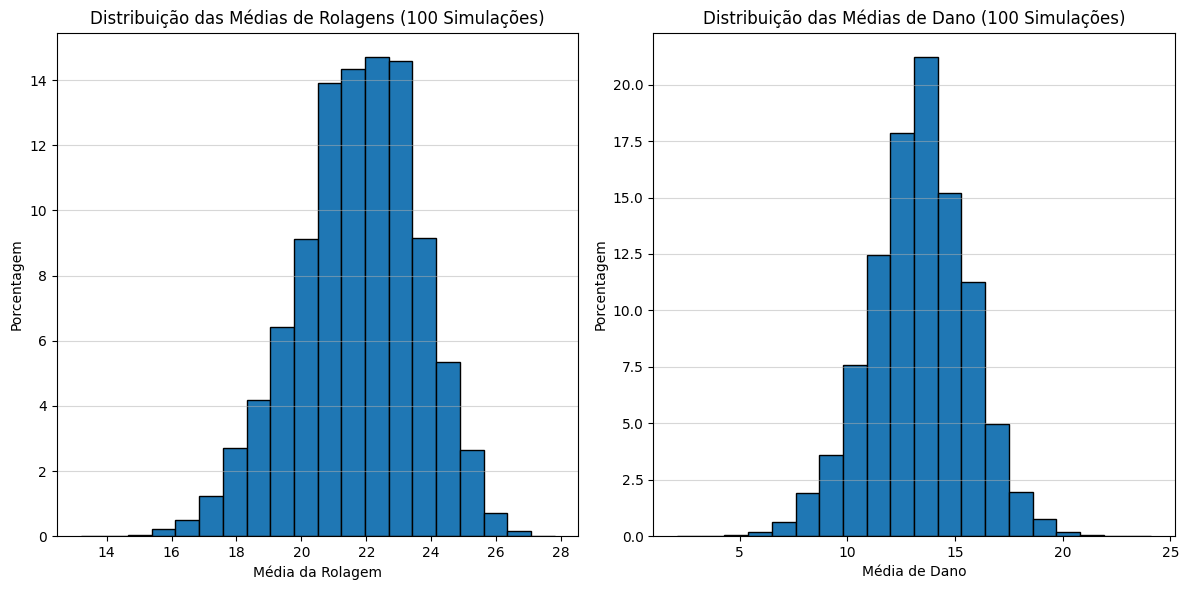

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Plot histogram for average rolagens with percentages
plt.subplot(1, 2, 1)
weights_rolagens = np.ones_like(all_avg_rolagens) / len(all_avg_rolagens)
plt.hist(all_avg_rolagens, bins=20, edgecolor='black', weights=weights_rolagens * 100)
plt.title('Distribuição das Médias de Rolagens (100 Simulações)')
plt.xlabel('Média da Rolagem')
plt.ylabel('Porcentagem')
plt.grid(axis='y', alpha=0.5)

# Plot histogram for average dano with percentages
plt.subplot(1, 2, 2)
weights_dano = np.ones_like(all_avg_dano) / len(all_avg_dano)
plt.hist(all_avg_dano, bins=20, edgecolor='black', weights=weights_dano * 100)
plt.title('Distribuição das Médias de Dano (100 Simulações)')
plt.xlabel('Média de Dano')
plt.ylabel('Porcentagem')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()